<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Nets for Sequential Data

-----
**OBJECTIVES**

- Explore Recurrent Architectures for sequential data
- Explore Convolutional Architectures for sequential data
- Use RNN's to model numeric time series data
- Use RNN's and CNN's to model text data
------

## The Recurrent Node

Compared to a convential neuron, our recurrent neuron will take in an output from the layer itself.  

<center>
   <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/440px-Recurrent_neural_network_unfold.svg.png />
</center>



### The Network Architecture

```python
state_t = 0
for input_t in input_sequences:
    output_t = tanh(W@input_t + U@state_t + b)
    state_t = output_t
```



### A Basic Sequence of Stock Prices

To begin, let's bring in stock data from yahoo using the `pandas_datareader`. 

In [32]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
#!pip install -U pandas_datareader

In [34]:
#get apple stock
apple = pdr.get_data_yahoo("AAPL")
#apple2 = pd.read_csv('appl.csv', index_col = 0)

In [35]:
#take a peek
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-03,27.865000,27.387501,27.745001,27.457500,107730400.0,25.882969
2016-11-04,27.562500,27.027500,27.132500,27.209999,123348000.0,25.649658
2016-11-07,27.627501,27.365000,27.520000,27.602501,130240000.0,26.019653
2016-11-08,27.930000,27.424999,27.577499,27.764999,97016800.0,26.172832
2016-11-09,27.830000,27.012501,27.469999,27.719999,236705600.0,26.130413


In [36]:
# apple.to_csv('appl.csv')

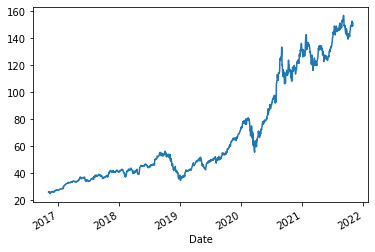

In [37]:
#plot the adjusted close
apple['Adj Close'].plot()

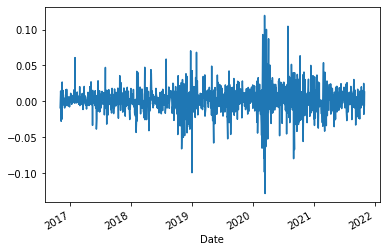

In [38]:
#look at the percent change
apple['Adj Close'].pct_change().plot()

In [50]:
#determine X and y
apple_pchange = apple.pct_change().dropna()
X = apple_pchange[['High', 'Low', 'Open', 'Volume']]
y2 = apple_pchange['Adj Close']
y = np.where(y2 > 0, 1, 0) #making a classification problem
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)
train_sequences = TimeseriesGenerator(X_train_scaled, y_train, length = 3)
test_sequences = TimeseriesGenerator(X_test_scaled, y_test, length = 3)

In [51]:
#train test split: no shuffle!
y = np.where(y2 > 0, 1, 0) #making a classification problem

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [54]:
X_train.tail()

,High,Low,Open,Volume
Date,,,,
2020-07-29,0.007192,0.004987,-0.006544,-0.128312
2020-07-30,0.011210,0.000587,0.004667,0.750597
2020-07-31,0.105065,0.075266,0.092342,1.367272
2020-08-03,0.049077,0.070097,0.051660,-0.176808
2020-08-04,-0.007591,0.004588,0.008618,-0.438355


In [55]:
X_test.head()

,High,Low,Open,Volume
Date,,,,
2020-08-05,-0.003588,0.004705,0.002245,-0.296379
2020-08-06,0.036415,0.008265,0.009394,0.662294
2020-08-07,-0.006446,0.004508,0.025361,-0.021653
2020-08-10,0.000880,-0.002652,-0.005344,0.072498
2020-08-11,-0.011360,-0.008114,-0.005595,-0.115352


### Scaling
------

Per usual we need to scale our data for the network.

In [56]:
from sklearn.preprocessing import StandardScaler

In [59]:
#instantiate
sscaler = StandardScaler()

In [60]:
#fit and transform
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

### `TimeSeriesGenerator`
-------
This creates stacks of sequenced data of which we specify the length of the sequences desired.

In [61]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [62]:
train_sequences = TimeseriesGenerator(X_train_scaled, y_train, length = 3)

In [64]:
#list(train_sequences)

In [65]:
test_sequences = TimeseriesGenerator(X_test_scaled, y_test, length = 3)

In [71]:
train_sequences.data

array([[-7.80205077e-01, -8.62381287e-01, -1.30786156e+00,
         2.31014307e-01],
       [ 4.79483206e-02,  6.35949383e-01,  6.98907997e-01,
        -3.91184106e-03],
       [ 5.86354611e-01,  3.41668802e-02,  2.59473961e-02,
        -8.23871398e-01],
       ...,
       [ 6.48473095e+00,  4.30570784e+00,  5.00745627e+00,
         3.45399477e+00],
       [ 2.97585890e+00,  4.00354275e+00,  2.76197032e+00,
        -6.17450062e-01],
       [-5.75620037e-01,  1.74184982e-01,  3.86313446e-01,
        -1.30710045e+00]])

In [ ]:
#test sequences


### Model with `SimpleRNN`
--------

- 1 `SimpleRNN` layer
- 1 hidden `Dense` layer

In [66]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense

In [67]:
#build the network
model1 = Sequential()
model1.add(SimpleRNN(16))
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [68]:
#compilation
model1.compile(loss = 'bce', metrics = ['accuracy'])

In [69]:
#fit it
history = model1.fit(train_sequences, validation_data=test_sequences, epochs = 10)

Epoch 1/10
8/8 [==============================] - 0s 42ms/step - loss: 0.7030 - accuracy: 0.4899 - val_loss: 0.7045 - val_accuracy: 0.4904
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6964 - accuracy: 0.5133 - val_loss: 0.7027 - val_accuracy: 0.5064
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5176 - val_loss: 0.7023 - val_accuracy: 0.5096
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6909 - accuracy: 0.5240 - val_loss: 0.7007 - val_accuracy: 0.5128
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6891 - accuracy: 0.5421 - val_loss: 0.7000 - val_accuracy: 0.5192
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6878 - accuracy: 0.5431 - val_loss: 0.7002 - val_accuracy: 0.5064
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.6865 - accuracy: 0.5485 - val_loss: 0.6990 - val_accuracy: 0.5160
Epoch 8/10
8/8 [=================

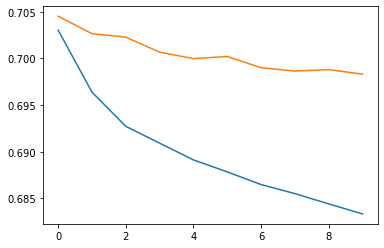

In [72]:
#loss?
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [73]:
y_test.mean()

0.5238095238095238

### The `LSTM` and `GRU` layers

In [74]:
#network with LSTM
model2 = Sequential()
model2.add(LSTM(16))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [75]:
#compile
model2.compile(loss = 'bce', metrics = ['accuracy'])

In [76]:
#fit
history = model2.fit(train_sequences, validation_data=test_sequences, epochs = 10)

Epoch 1/10
8/8 [==============================] - 1s 69ms/step - loss: 0.6942 - accuracy: 0.4931 - val_loss: 0.6921 - val_accuracy: 0.5288
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6905 - accuracy: 0.5495 - val_loss: 0.6922 - val_accuracy: 0.5256
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6891 - accuracy: 0.5495 - val_loss: 0.6927 - val_accuracy: 0.5224
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.6885 - accuracy: 0.5495 - val_loss: 0.6931 - val_accuracy: 0.5224
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.5495 - val_loss: 0.6939 - val_accuracy: 0.5224
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6877 - accuracy: 0.5495 - val_loss: 0.6943 - val_accuracy: 0.5224
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.5495 - val_loss: 0.6943 - val_accuracy: 0.5224
Epoch 8/10
8/8 [================

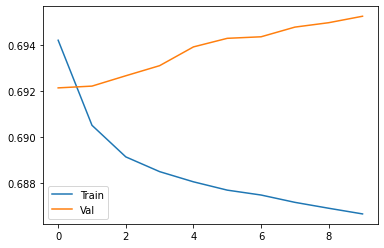

In [77]:
#examine the loss
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.legend();

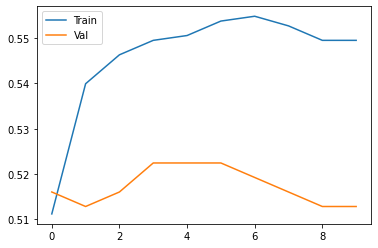

In [83]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.legend();

In [79]:
#GRU layer
model3 = Sequential()
model3.add(GRU(16))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [80]:
#compile
model3.compile(loss = 'bce', metrics = ['accuracy'])

In [84]:
#train_sequences.targets

In [81]:
#fit
history = model3.fit(train_sequences, validation_data=test_sequences, epochs = 10)

Epoch 1/10
8/8 [==============================] - 1s 66ms/step - loss: 0.6933 - accuracy: 0.5112 - val_loss: 0.6920 - val_accuracy: 0.5160
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 0.6894 - accuracy: 0.5399 - val_loss: 0.6909 - val_accuracy: 0.5128
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 0.6878 - accuracy: 0.5463 - val_loss: 0.6906 - val_accuracy: 0.5160
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.6867 - accuracy: 0.5495 - val_loss: 0.6906 - val_accuracy: 0.5224
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.6860 - accuracy: 0.5506 - val_loss: 0.6910 - val_accuracy: 0.5224
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 0.6853 - accuracy: 0.5538 - val_loss: 0.6909 - val_accuracy: 0.5224
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6850 - accuracy: 0.5548 - val_loss: 0.6914 - val_accuracy: 0.5192
Epoch 8/10
8/8 [===========

In [ ]:
#examine the loss


In [86]:
#stacking layers
model4 = Sequential()
model4.add(GRU(32, return_sequences = True))
# model4.add(GRU(16, return_sequences = True))
# model4.add(GRU(16, return_sequences = True))
model4.add(GRU(16))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(loss = 'bce', metrics = ['accuracy'])
history = model4.fit(train_sequences, validation_data = test_sequences, epochs = 10)

Epoch 1/10
8/8 [==============================] - 1s 101ms/step - loss: 0.6908 - accuracy: 0.5538 - val_loss: 0.6938 - val_accuracy: 0.5224
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 0.6884 - accuracy: 0.5495 - val_loss: 0.6944 - val_accuracy: 0.5224
Epoch 3/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6879 - accuracy: 0.5495 - val_loss: 0.6956 - val_accuracy: 0.5224
Epoch 4/10
8/8 [==============================] - 0s 14ms/step - loss: 0.6874 - accuracy: 0.5495 - val_loss: 0.6964 - val_accuracy: 0.5224
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.6872 - accuracy: 0.5495 - val_loss: 0.6969 - val_accuracy: 0.5224
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6870 - accuracy: 0.5495 - val_loss: 0.6962 - val_accuracy: 0.5224
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6867 - accuracy: 0.5495 - val_loss: 0.6958 - val_accuracy: 0.5224
Epoch 8/10
8/8 [==========

### Practice

Use pandas datareader to access stock data for a ticker of interest.  Build and compare different sequential models using `GRU` layers.   

### Sequential Models for Text
-------

Now, we use the Keras `Tokenizer` to preprocess our spam data and feed it through different architectures of sequential network models.

In [87]:
import pandas as pd
import numpy as np

In [88]:
from keras.preprocessing.text import Tokenizer

In [89]:
spam = pd.read_csv('data/sms_spam.csv')

In [90]:
spam.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


### `Tokenizer`
------
Here, we set the limit to the number of words at 500, then fit the texts, and finally transform our text to sequences of integer values with the `.texts_to_sequences`.  To assure the same length we use the `pad_sequences` function.  

In [91]:
#create a tokenizer and specify the vocabulary
tokenizer = Tokenizer(500)

In [92]:
#fit it on text
tokenizer.fit_on_texts(spam['text'])

In [93]:
#generate sequences
sequences = tokenizer.texts_to_sequences(spam['text'])

In [95]:
sequences[:3]

[[122, 3, 22, 313, 4, 53, 110, 37, 8],
 [92, 134, 86, 11, 170],
 [60, 179, 155, 8, 62, 24, 17, 2, 387]]

In [96]:
from keras.preprocessing.sequence import pad_sequences

In [97]:
#pad sequences to 100
X = pad_sequences(sequences, maxlen = 100)

In [99]:
#take a peek
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       122,   3,  22, 313,   4,  53, 110,  37,   8], dtype=int32)

In [100]:
X.shape

(5559, 100)

### Model
-------

In [101]:
from keras.layers import Embedding

In [104]:
#sequential model
text_model1 = Sequential()
#embedding layer
text_model1.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
#simple RNN
text_model1.add(SimpleRNN(16))
#dense layer
text_model1.add(Dense(20, activation = 'relu'))
#output
text_model1.add(Dense(1, activation = 'sigmoid'))
#compilation
text_model1.compile(loss = 'bce', metrics = ['accuracy'])

In [105]:
#make y binary
y = np.where(spam['type'] == 'ham', 0, 1)

In [107]:
#baseline?
1 - np.mean(y)

0.8656233135456017

In [108]:
#fit it
history = text_model1.fit(X, y, epochs = 10)

Epoch 1/10
174/174 [==============================] - 4s 23ms/step - loss: 0.4036 - accuracy: 0.8662
Epoch 2/10
174/174 [==============================] - 4s 22ms/step - loss: 0.0982 - accuracy: 0.9723
Epoch 3/10
174/174 [==============================] - 4s 21ms/step - loss: 0.0523 - accuracy: 0.9838
Epoch 4/10
174/174 [==============================] - 4s 22ms/step - loss: 0.0380 - accuracy: 0.9887
Epoch 5/10
174/174 [==============================] - 4s 25ms/step - loss: 0.0316 - accuracy: 0.9899
Epoch 6/10
174/174 [==============================] - 4s 24ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 7/10
174/174 [==============================] - 4s 23ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 8/10
174/174 [==============================] - 4s 22ms/step - loss: 0.0155 - accuracy: 0.9959
Epoch 9/10
174/174 [==============================] - 4s 22ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 10/10
174/174 [==============================] - 4s 23ms/step - loss: 0.0126 - accura

### Improving the Model
-----

- `LSTM` layers
- `GRU` layers
- `recurrent_dropout`
- `dropout`
- `Bidirectional` layers

In [111]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(GRU(16))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y, epochs = 10)

Epoch 1/10
174/174 [==============================] - 8s 44ms/step - loss: 0.2482 - acc: 0.9223
Epoch 2/10
 88/174 [==============>...............] - ETA: 3s - loss: 0.0495 - acc: 0.9844

KeyboardInterrupt: 

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(GRU(16, recurrent_dropout = 0.2))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(GRU(16, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(x_seq, y)

In [ ]:
from keras.layers import Bidirectional

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(Bidirectional(GRU(16)))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(x_seq, y)

### Convolutional Networks in 1D
--------

In [ ]:
from keras.layers import Conv1D, MaxPooling1D